Data Visualization และ Data Analytics เพื่อตรวจสอบว่าข้อมูลที่ถูก Augment แล้วมีประสิทธิภาพหรือไม่ 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ✅ โหลดข้อมูลก่อนและหลัง Augmentation
df_before = pd.read_csv("dataset/dataset_augmented1.csv")  
df_after = pd.read_csv("dataset/dataset_augmented2.csv")  

C:\Users\keeta\AppData\Local\Temp\ipykernel_7788\87272162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_before["label"], ax=axes[0], palette="Set1")
C:\Users\keeta\AppData\Local\Temp\ipykernel_7788\87272162.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_after["label"], ax=axes[1], palette="Set2")


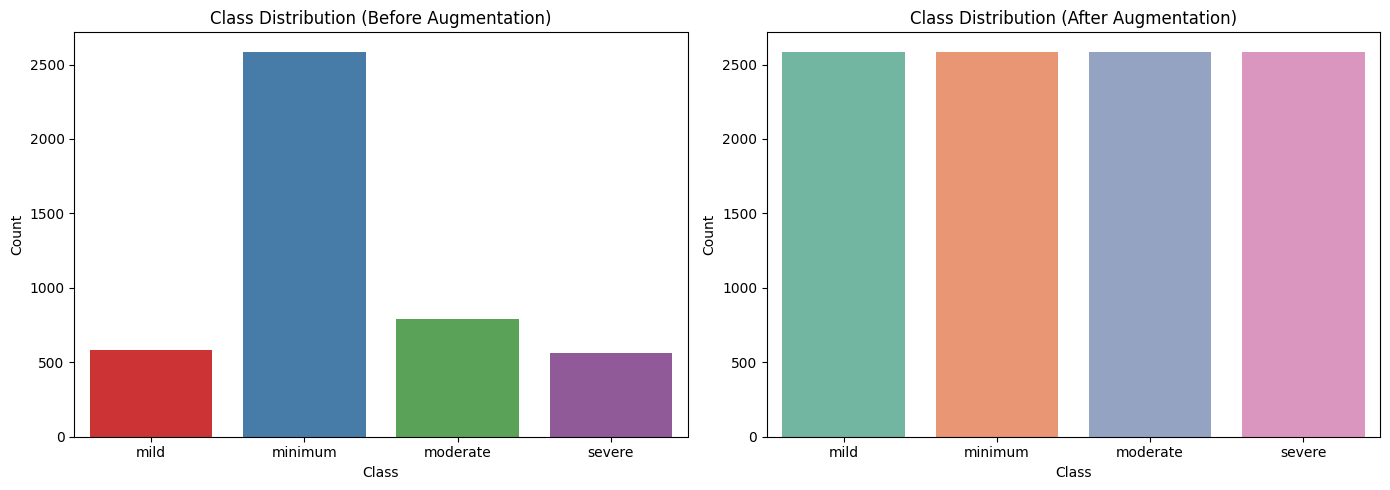

In [3]:
# ✅ 1. แสดงจำนวนตัวอย่างของแต่ละคลาส
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ข้อมูลก่อน Augmentation
sns.countplot(x=df_before["label"], ax=axes[0], palette="Set1")
axes[0].set_title("Class Distribution (Before Augmentation)")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# ข้อมูลหลัง Augmentation
sns.countplot(x=df_after["label"], ax=axes[1], palette="Set2")
axes[1].set_title("Class Distribution (After Augmentation)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

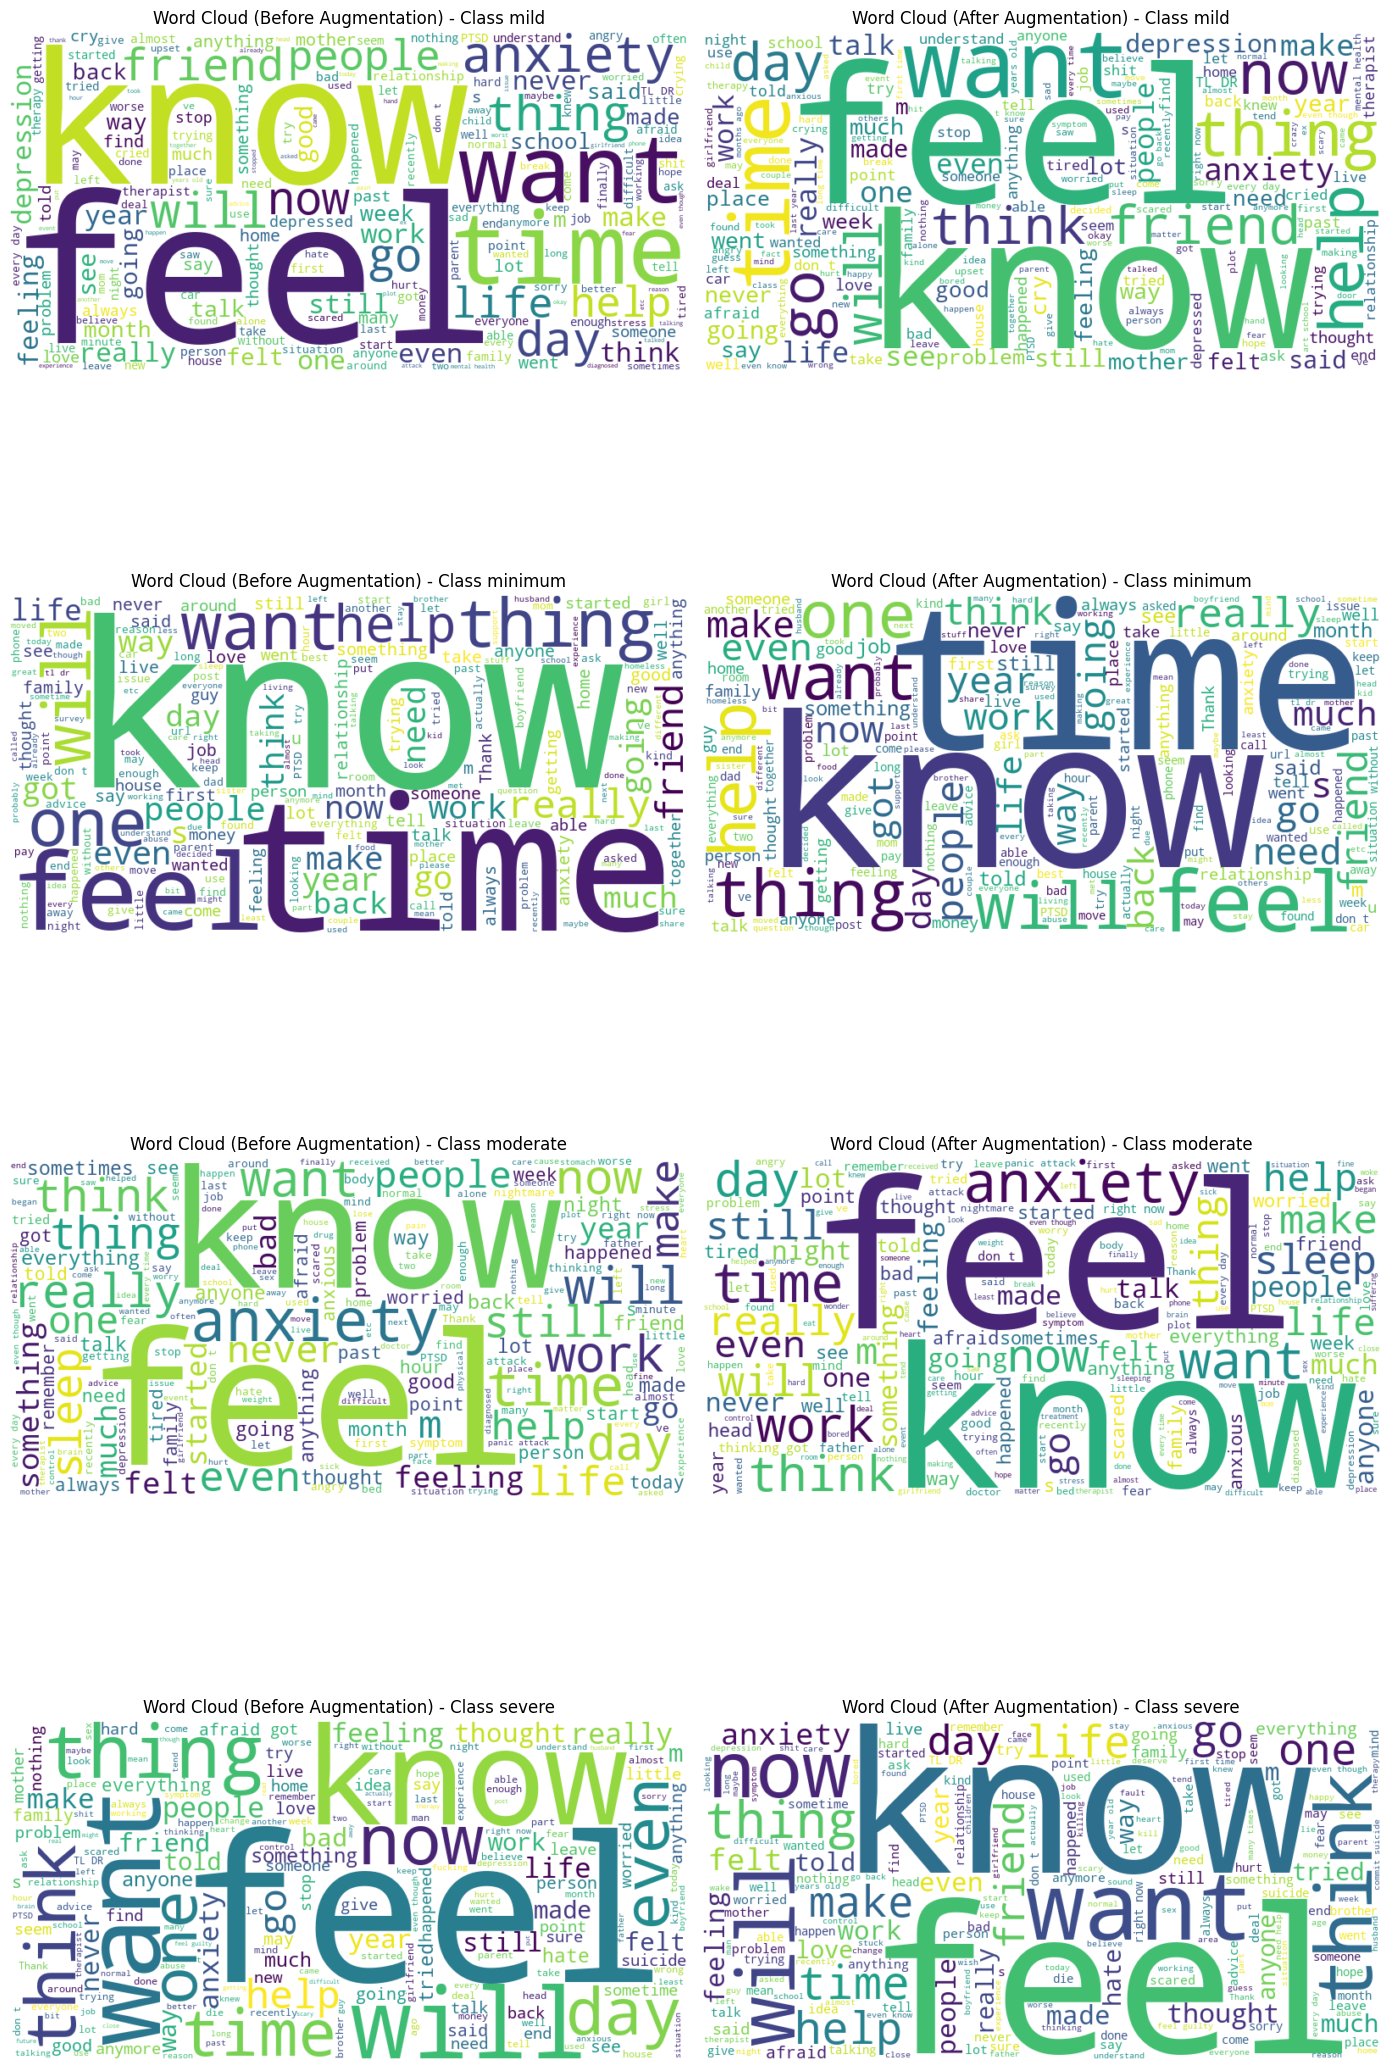

In [7]:
unique_classes = df_before["label"].unique()  # ดึงรายชื่อคลาสทั้งหมด
fig, axes = plt.subplots(len(unique_classes), 2, figsize=(14, 6 * len(unique_classes)))

for i, label in enumerate(unique_classes):
    # สร้าง Word Cloud สำหรับแต่ละคลาส
    text_before = " ".join(df_before[df_before["label"] == label]["text"])
    text_after = " ".join(df_after[df_after["label"] == label]["text"])
    
    wordcloud_before = WordCloud(width=800, height=400, background_color="white").generate(text_before)
    wordcloud_after = WordCloud(width=800, height=400, background_color="white").generate(text_after)
    
    # แสดง Word Cloud ก่อนการ Augmentation
    axes[i, 0].imshow(wordcloud_before, interpolation="bilinear")
    axes[i, 0].set_title(f"Word Cloud (Before Augmentation) - Class {label}")
    axes[i, 0].axis("off")
    
    # แสดง Word Cloud หลังการ Augmentation
    axes[i, 1].imshow(wordcloud_after, interpolation="bilinear")
    axes[i, 1].set_title(f"Word Cloud (After Augmentation) - Class {label}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


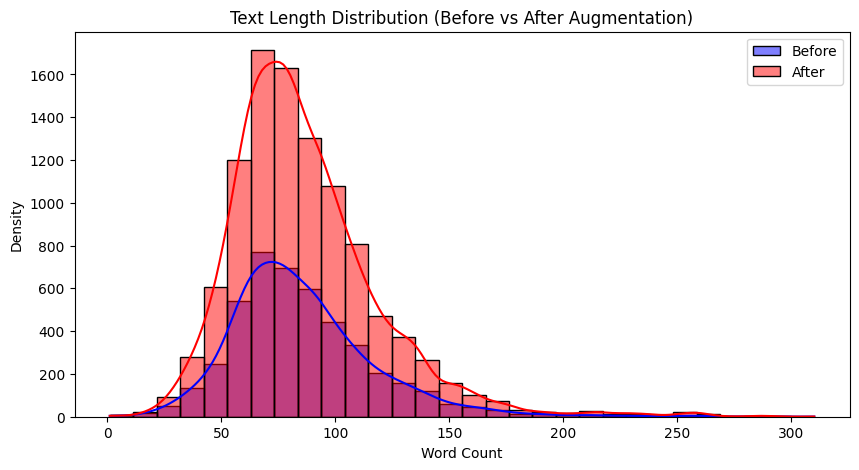

In [5]:
# ✅ 3. ตรวจสอบความยาวของข้อความก่อนและหลัง Augmentation
df_before["text_length"] = df_before["text"].apply(lambda x: len(x.split()))
df_after["text_length"] = df_after["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df_before["text_length"], kde=True, color="blue", label="Before", bins=30)
sns.histplot(df_after["text_length"], kde=True, color="red", label="After", bins=30)
plt.legend()
plt.title("Text Length Distribution (Before vs After Augmentation)")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.show()

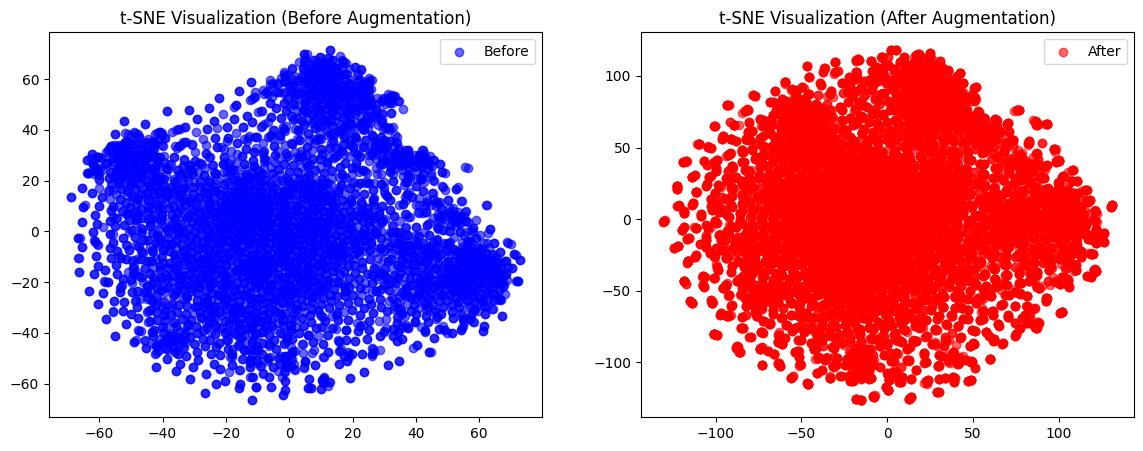

In [6]:
# ✅ 4. วิเคราะห์การกระจายตัวของข้อความด้วย PCA + t-SNE
vectorizer = TfidfVectorizer(max_features=500)
X_before = vectorizer.fit_transform(df_before["text"]).toarray()
X_after = vectorizer.transform(df_after["text"]).toarray()

# ใช้ PCA ลดมิติจาก 500 → 50 ก่อนใช้ t-SNE
pca = PCA(n_components=50)
X_before_pca = pca.fit_transform(X_before)
X_after_pca = pca.transform(X_after)

# ใช้ t-SNE เพื่อลดเหลือ 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_before_tsne = tsne.fit_transform(X_before_pca)
X_after_tsne = tsne.fit_transform(X_after_pca)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(X_before_tsne[:, 0], X_before_tsne[:, 1], alpha=0.6, c="blue", label="Before")
ax[0].set_title("t-SNE Visualization (Before Augmentation)")
ax[0].legend()

ax[1].scatter(X_after_tsne[:, 0], X_after_tsne[:, 1], alpha=0.6, c="red", label="After")
ax[1].set_title("t-SNE Visualization (After Augmentation)")
ax[1].legend()

plt.show()